In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/home/maxime/anaconda2/envs/py34/lib/python3.4/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
class Bandit:
    def __init__(self, m, initial_value):
        self.m = m
        self.mean = initial_value
        self.N = 0
    
    def pull(self):
        drawn_value = np.random.randn() + self.m
        # update
        self.N += 1
        self.mean = (1.0 - (1.0/self.N))*self.mean + (1.0/self.N)*drawn_value
        return drawn_value

1.0 / 0.8956439866818381 / 1
2.0 / 1.5409990110786285 / 2
3.0 / 3.039990764463001 / 997


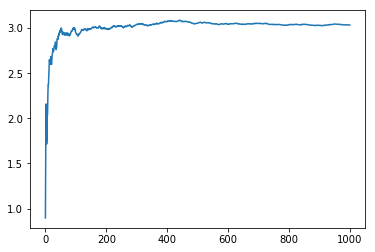

In [6]:
initial_value = 10.0
bandits = [Bandit(1.0, initial_value), Bandit(2.0, initial_value), Bandit(3.0, initial_value)]
M = len(bandits)
N = 1000

data = np.empty(N)

for i in range(N):
    j = np.argmax([bandit.mean for bandit in bandits])
    x = bandits[j].pull()
    data[i] = x

# plots
cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
plt.plot(cumulative_average)

# written outputs
print("\n".join(["{} / {} / {}".format(bandit.m, bandit.mean, bandit.N) for bandit in bandits]))